### Project: Forest Fire Risk Prediction
### Task: Initial Data Exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [3]:
print(df.head(10))

  day month  year Temperature  RH  Ws Rain   FFMC   DMC    DC  ISI   BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7   3.4   7.6  1.3   3.4  0.5   
1   2     6  2012          29  61  13   1.3  64.4   4.1   7.6    1   3.9  0.4   
2   3     6  2012          26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3   4     6  2012          25  89  13   2.5  28.6   1.3   6.9    0   1.7    0   
4   5     6  2012          27  77  16     0  64.8     3  14.2  1.2   3.9  0.5   
5   6     6  2012          31  67  14     0  82.6   5.8  22.2  3.1     7  2.5   
6   7     6  2012          33  54  13     0  88.2   9.9  30.5  6.4  10.9  7.2   
7   8     6  2012          30  73  15     0  86.6  12.1  38.3  5.6  13.5  7.1   
8   9     6  2012          25  88  13   0.2  52.9   7.9  38.8  0.4  10.5  0.3   
9  10     6  2012          28  79  12     0  73.2   9.5  46.3  1.3  12.6  0.9   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire     
5     

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df_cleaned = df.drop(columns=['day', 'month', 'year'])

In [6]:
df_cleaned.rename(columns={'Classes': 'Fire_Risk'}, inplace=True)

In [7]:
df_cleaned['Fire_Risk'] = df_cleaned['Fire_Risk'].apply(lambda x: 1 if str(x).strip().lower() == 'fire' else 0)

In [8]:
df_cleaned.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire_Risk
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0
5,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,1
6,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,1
7,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0
9,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,0


In [9]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  245 non-null    object
 1   RH           245 non-null    object
 2   Ws           245 non-null    object
 3   Rain         245 non-null    object
 4   FFMC         245 non-null    object
 5   DMC          245 non-null    object
 6   DC           245 non-null    object
 7   ISI          245 non-null    object
 8   BUI          245 non-null    object
 9   FWI          245 non-null    object
 10  Fire_Risk    247 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 21.4+ KB
None


In [10]:
print(df_cleaned.describe())

        Fire_Risk
count  247.000000
mean     0.554656
std      0.498013
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000


In [11]:
print(df_cleaned.isnull().sum())

Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Fire_Risk      0
dtype: int64


In [12]:
df_cleaned = df_cleaned.dropna()

In [13]:
# Convert all columns except 'Fire_Risk' to numeric
for col in df_cleaned.columns:
    if col != 'Fire_Risk':
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# handle missing values
df_cleaned = df_cleaned.fillna(df_cleaned.mean())


In [14]:
df_cleaned = df_cleaned.fillna(0)

In [15]:
df_cleaned = df_cleaned.fillna(method='ffill')

/tmp/ipython-input-249688608.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_cleaned.fillna(method='ffill')


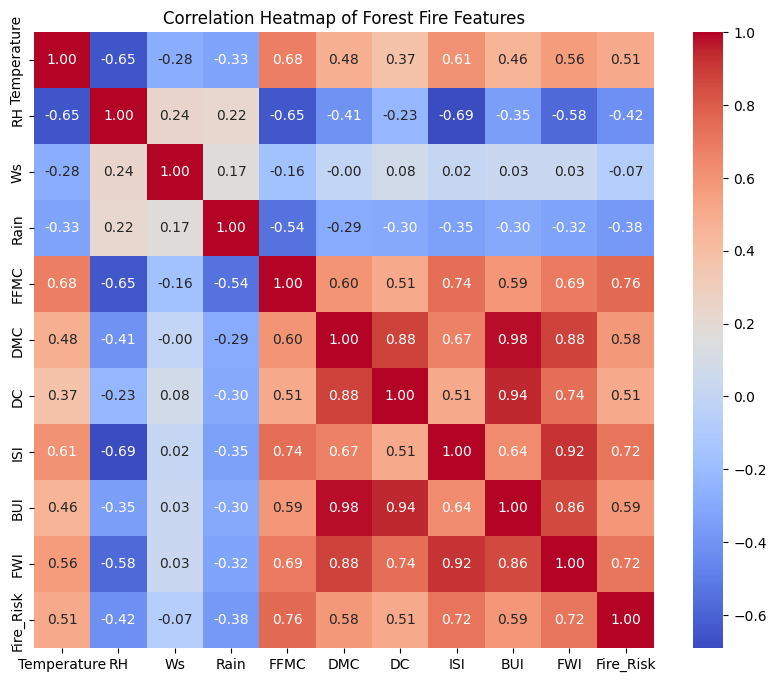

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Forest Fire Features")
plt.show()

/tmp/ipython-input-1468700006.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Fire_Risk", data=df_cleaned, palette="Set2")


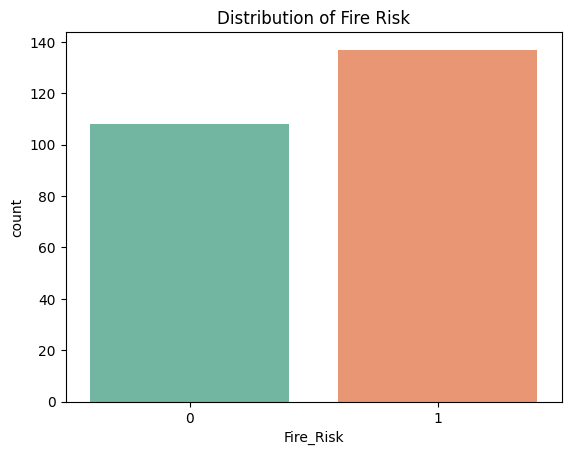

In [17]:
sns.countplot(x="Fire_Risk", data=df_cleaned, palette="Set2")
plt.title("Distribution of Fire Risk")
plt.show()


/tmp/ipython-input-2798019635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Fire_Risk", y=col, data=df_cleaned, palette="Set3")
/tmp/ipython-input-2798019635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Fire_Risk", y=col, data=df_cleaned, palette="Set3")
/tmp/ipython-input-2798019635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Fire_Risk", y=col, data=df_cleaned, palette="Set3")
/tmp/ipython-input-2798019635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

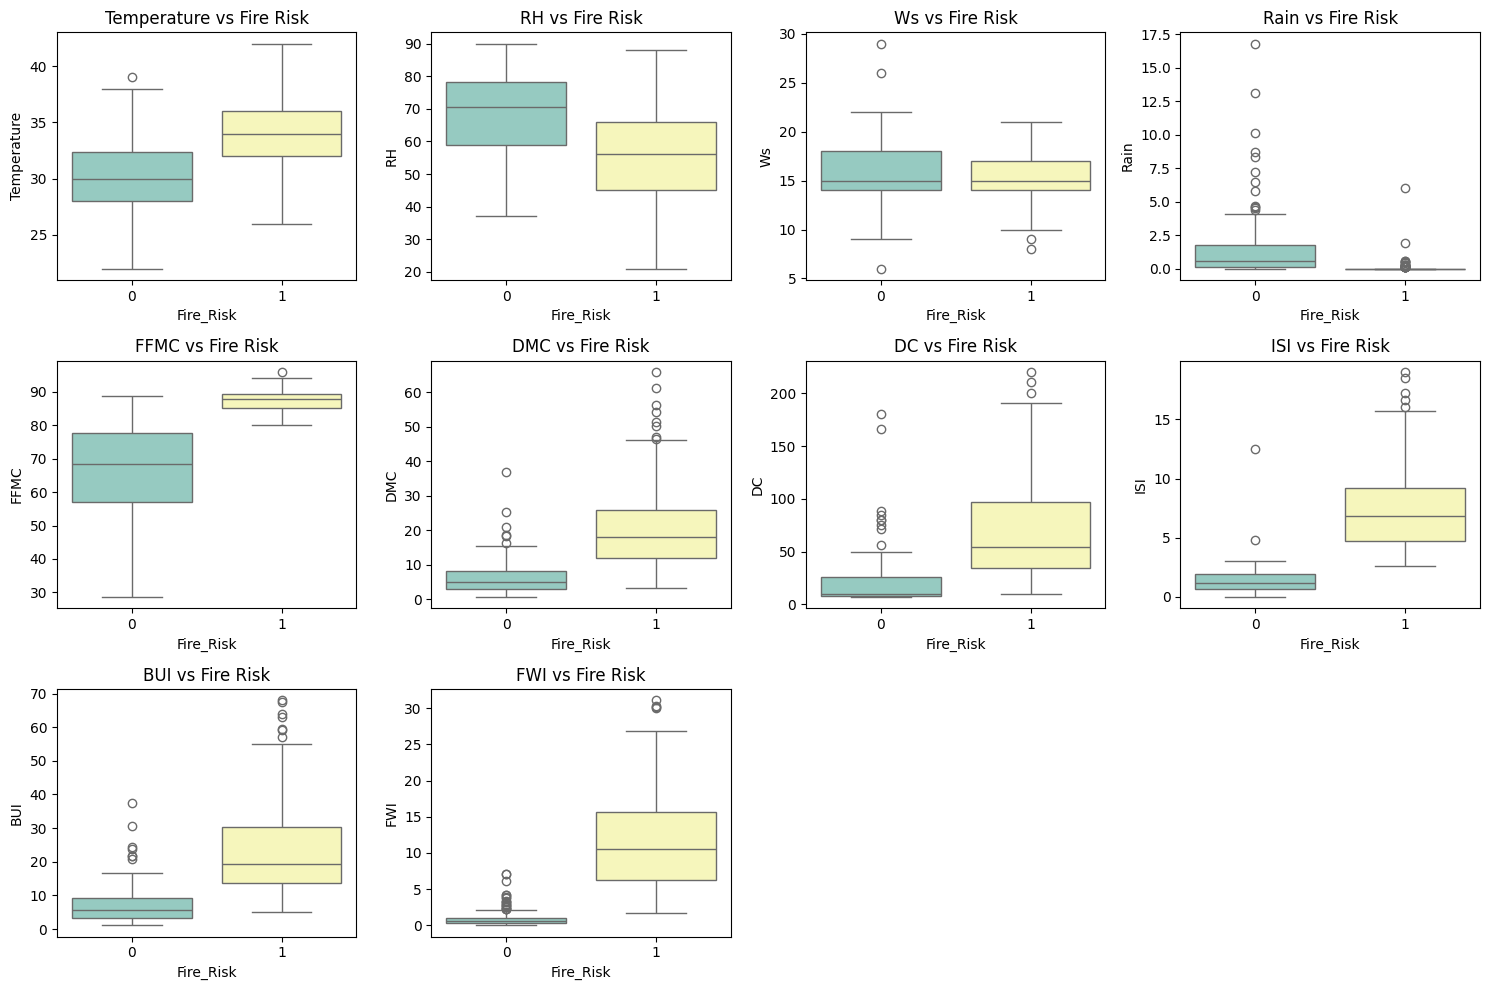

In [18]:
features = ["Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]

plt.figure(figsize=(15,10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x="Fire_Risk", y=col, data=df_cleaned, palette="Set3")
    plt.title(f"{col} vs Fire Risk")
plt.tight_layout()
plt.show()


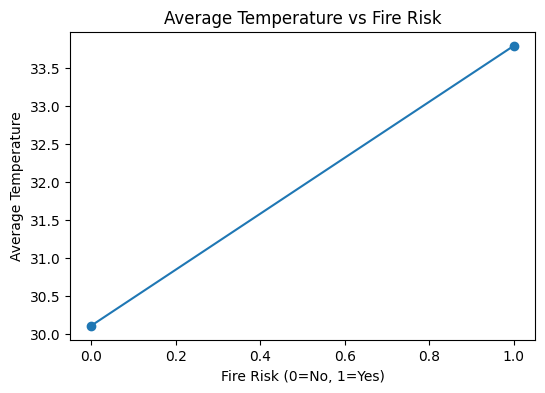

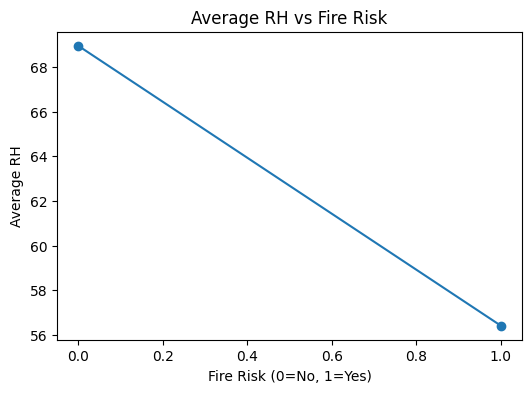

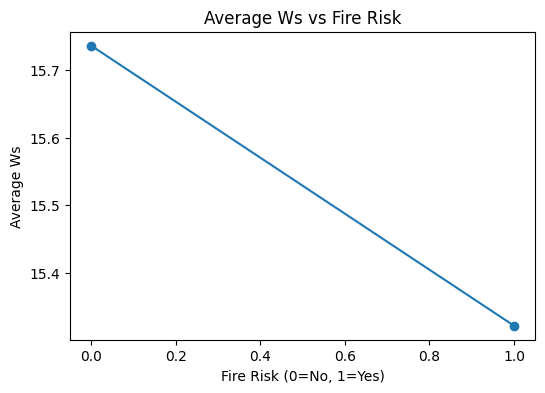

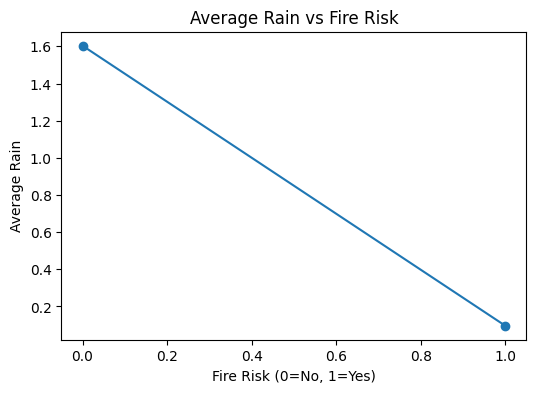

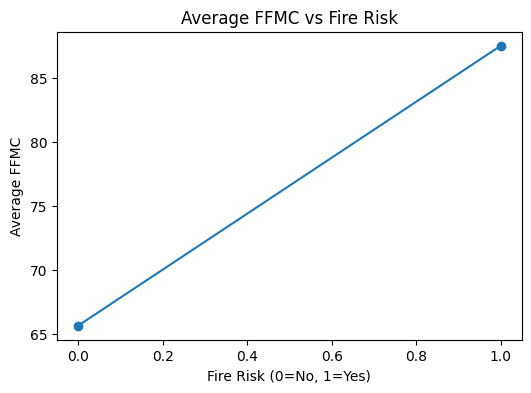

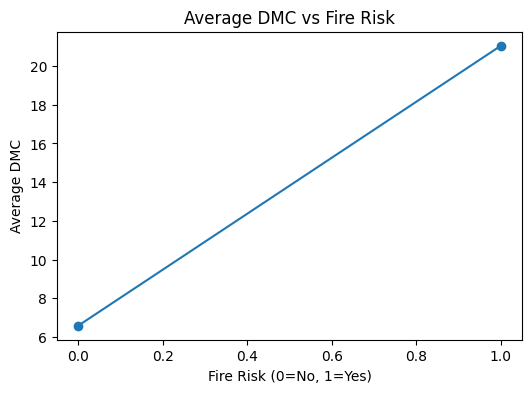

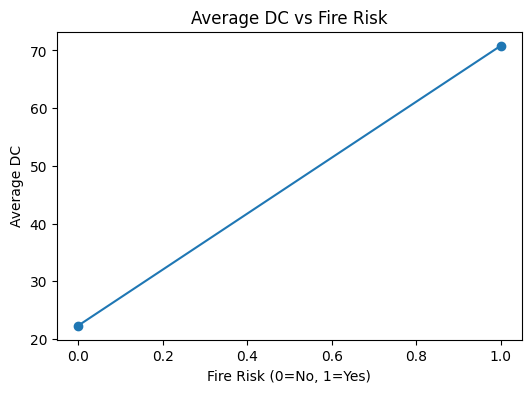

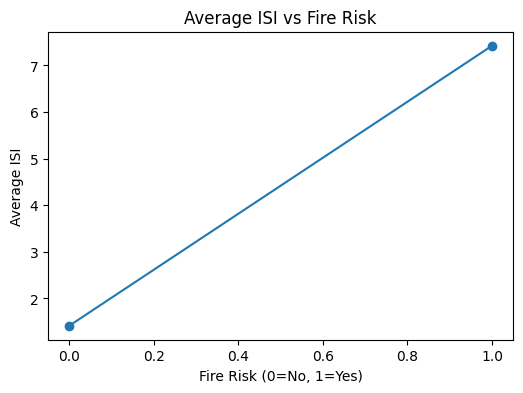

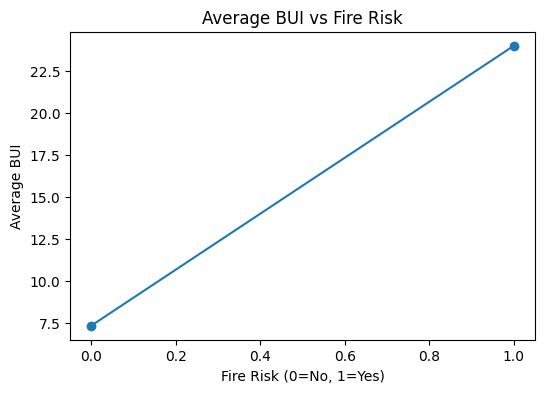

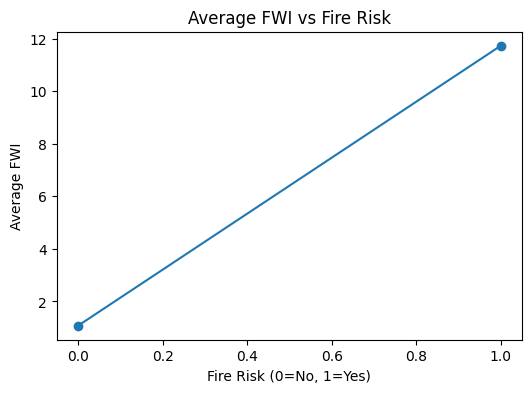

In [19]:
for col in features:
    plt.figure(figsize=(6,4))
    mean_vals = df_cleaned.groupby("Fire_Risk")[col].mean()
    plt.plot(mean_vals.index, mean_vals.values, marker="o", linestyle="-")
    plt.title(f"Average {col} vs Fire Risk")
    plt.xlabel("Fire Risk (0=No, 1=Yes)")
    plt.ylabel(f"Average {col}")
    plt.show()

In [20]:
df = df_cleaned.copy()  # work on a copy

# 1) Simple derived features
df['IsRain'] = (df['Rain'] > 0).astype(int)
df['Dryness'] = df['Temperature'] / (df['RH'] + 1e-6)               # higher -> drier
df['Temp_Ws'] = df['Temperature'] * df['Ws']                       # interaction
df['FFMC_x_DMC'] = df['FFMC'] * df['DMC']

# 2) Log-transform heavy-tailed columns (avoid negative/zero issues)
for c in ['DC','BUI','FWI','Rain']:
    if c in df.columns:
        df[c + '_log'] = np.log1p(df[c].clip(lower=0))

# 3) Optional: scale later in pipeline, not here
# 4) Feature list
features = [c for c in df.columns if c not in ['Fire_Risk']]
print("Features prepared:", features)

Features prepared: ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'IsRain', 'Dryness', 'Temp_Ws', 'FFMC_x_DMC', 'DC_log', 'BUI_log', 'FWI_log', 'Rain_log']


In [21]:
# Quick class balance check
print(df['Fire_Risk'].value_counts(normalize=True))

# Approach A: use class_weight in models (easy & robust)
# Approach B (if extremely imbalanced): use SMOTE for oversampling
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)


Fire_Risk
1    0.559184
0    0.440816
Name: proportion, dtype: float64


In [22]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['Fire_Risk']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train/Val/Test sizes:", X_train.shape, X_val.shape, X_test.shape)


Train/Val/Test sizes: (171, 18) (37, 18) (37, 18)


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# pick numeric columns (exclude any object columns)
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols)
])

# Logistic Regression pipeline
pipe_lr = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])

# Random Forest pipeline
pipe_rf = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42))
])

# Fit baseline LR
pipe_lr.fit(X_train, y_train)
y_pred_val_lr = pipe_lr.predict(X_val)
y_pred_proba_lr = pipe_lr.predict_proba(X_val)[:,1]

print("Logistic Regression Validation")
print(classification_report(y_val, y_pred_val_lr))
print("ROC-AUC:", roc_auc_score(y_val, y_pred_proba_lr))
print("Confusion matrix:\n", confusion_matrix(y_val, y_pred_val_lr))

# Fit baseline RF
pipe_rf.fit(X_train, y_train)
y_pred_val_rf = pipe_rf.predict(X_val)
y_pred_proba_rf = pipe_rf.predict_proba(X_val)[:,1]

print("Random Forest Validation")
print(classification_report(y_val, y_pred_val_rf))
print("ROC-AUC:", roc_auc_score(y_val, y_pred_proba_rf))
print("Confusion matrix:\n", confusion_matrix(y_val, y_pred_val_rf))


Logistic Regression Validation
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.91      0.95      0.93        21

    accuracy                           0.92        37
   macro avg       0.92      0.91      0.92        37
weighted avg       0.92      0.92      0.92        37

ROC-AUC: 0.9523809523809523
Confusion matrix:
 [[14  2]
 [ 1 20]]
Random Forest Validation
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.91      1.00      0.95        21

    accuracy                           0.95        37
   macro avg       0.96      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37

ROC-AUC: 0.9806547619047619
Confusion matrix:
 [[14  2]
 [ 0 21]]


In [24]:
import numpy as np
from sklearn.metrics import precision_recall_curve

probs = pipe_rf.predict_proba(X_val)[:,1]
prec, rec, thresh = precision_recall_curve(y_val, probs)
# Choose threshold that gives desired recall (e.g., rec >= 0.9)
idx = np.where(rec >= 0.9)[0]
if idx.size > 0:
    th = thresh[idx[0]]
    print("Threshold to reach recall>=0.9:", th)


Threshold to reach recall>=0.9: 0.0


In [25]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

# predicted probabilities
probs = pipe_rf.predict_proba(X_val)[:,1]

# precision, recall, thresholds
prec, rec, thresh = precision_recall_curve(y_val, probs)

# Ignore the first point (rec[0] = 1.0)
valid_idx = np.where(rec[1:] >= 0.9)[0]

best_threshold = 0.5  # default
best_f1 = 0

for i in valid_idx:
    threshold = thresh[i]  # now aligned properly
    preds = (probs >= threshold).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print("Best threshold with recall>=0.9:", best_threshold)
print("F1 at this threshold:", best_f1)


Best threshold with recall>=0.9: 0.51
F1 at this threshold: 0.9545454545454546


In [26]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

def evaluate_with_threshold(model, X, y, threshold=0.5, name="Model"):
    probs = model.predict_proba(X)[:,1]
    preds = (probs >= threshold).astype(int)

    print(f"\n{name} Evaluation (Threshold={threshold})")
    print(classification_report(y, preds, digits=2))
    print("ROC-AUC:", roc_auc_score(y, probs))
    print("Confusion matrix:\n", confusion_matrix(y, preds))

# Logistic Regression (using threshold 0.51)
evaluate_with_threshold(pipe_lr, X_test, y_test, threshold=0.51, name="Logistic Regression")

# Random Forest (using threshold 0.51)
evaluate_with_threshold(pipe_rf, X_test, y_test, threshold=0.51, name="Random Forest")


Logistic Regression Evaluation (Threshold=0.51)
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        17
           1       0.86      0.95      0.90        20

    accuracy                           0.89        37
   macro avg       0.90      0.89      0.89        37
weighted avg       0.90      0.89      0.89        37

ROC-AUC: 0.9852941176470588
Confusion matrix:
 [[14  3]
 [ 1 19]]

Random Forest Evaluation (Threshold=0.51)
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.95      1.00      0.98        20

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37

ROC-AUC: 1.0
Confusion matrix:
 [[16  1]
 [ 0 20]]


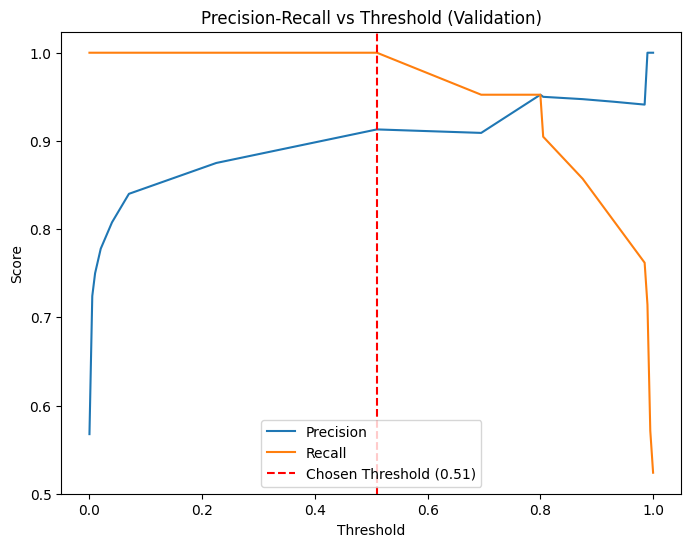

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Get precision-recall curve
probs = pipe_rf.predict_proba(X_val)[:,1]
prec, rec, thresh = precision_recall_curve(y_val, probs)

plt.figure(figsize=(8,6))
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.axvline(x=0.51, color="red", linestyle="--", label="Chosen Threshold (0.51)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold (Validation)")
plt.legend()
plt.show()


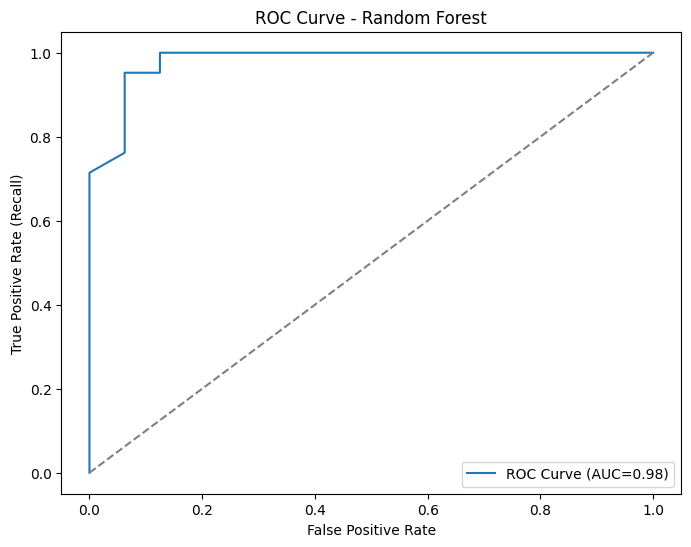

In [28]:
fpr, tpr, _ = roc_curve(y_val, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


/tmp/ipython-input-2914363512.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


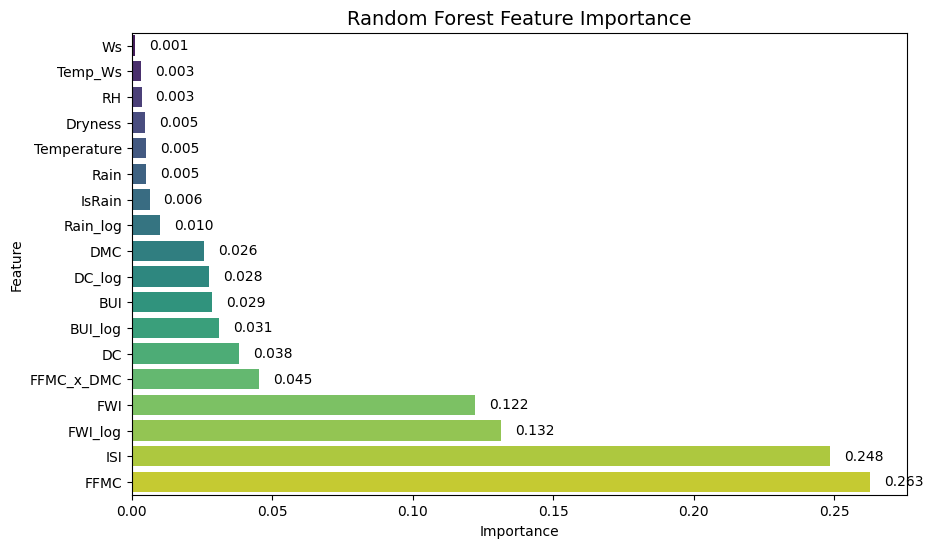

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract feature names from training set
feature_names = X_train.columns

# Extract feature importances from RF inside pipeline
importances = pipe_rf.named_steps["clf"].feature_importances_

# Create DataFrame
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")

# Add values on bars
for i, (imp, feat) in enumerate(zip(feat_imp["Importance"], feat_imp["Feature"])):
    plt.text(imp + 0.005, i, f"{imp:.3f}", va="center")

plt.title("Random Forest Feature Importance", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



Logistic Regression — TEST Evaluation (threshold=0.51)
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        17
           1       0.86      0.95      0.90        20

    accuracy                           0.89        37
   macro avg       0.90      0.89      0.89        37
weighted avg       0.90      0.89      0.89        37

ROC-AUC: 0.9852941176470588
Average Precision (PR AUC): 0.9900000000000002
Confusion matrix:
 [[14  3]
 [ 1 19]]


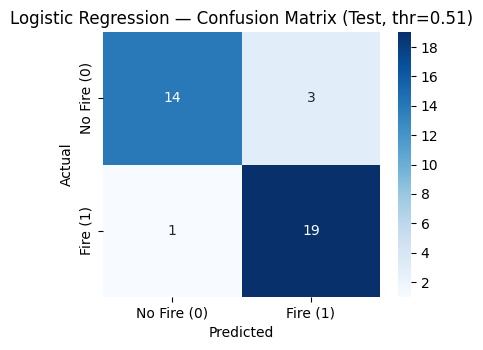

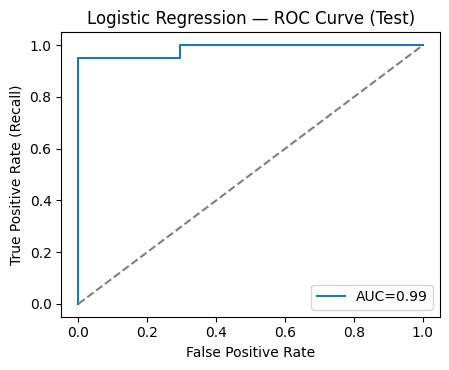

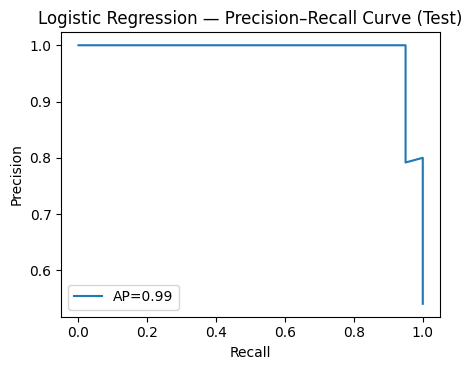


Random Forest — TEST Evaluation (threshold=0.51)
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.95      1.00      0.98        20

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37

ROC-AUC: 1.0
Average Precision (PR AUC): 1.0
Confusion matrix:
 [[16  1]
 [ 0 20]]


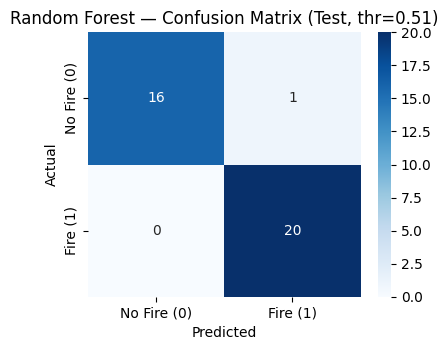

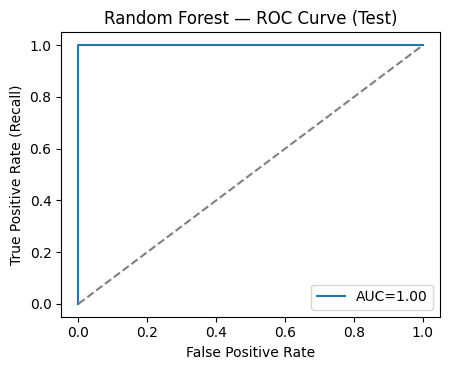

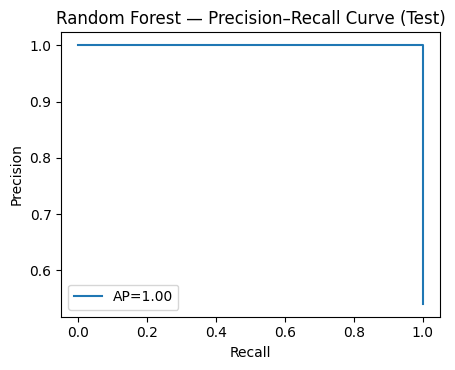

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix,
    roc_curve, auc, precision_recall_curve, average_precision_score
)

THRESHOLD = 0.51  # from your validation tuning

def evaluate_with_threshold(model, X, y, threshold=0.5, name="Model"):
    probs = model.predict_proba(X)[:, 1]
    preds = (probs >= threshold).astype(int)

    print(f"\n{name} — TEST Evaluation (threshold={threshold})")
    print(classification_report(y, preds, digits=2))
    print("ROC-AUC:", roc_auc_score(y, probs))
    print("Average Precision (PR AUC):", average_precision_score(y, probs))
    print("Confusion matrix:\n", confusion_matrix(y, preds))

    # Confusion matrix heatmap
    cm = confusion_matrix(y, preds)
    plt.figure(figsize=(4.2,3.6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Fire (0)", "Fire (1)"],
                yticklabels=["No Fire (0)", "Fire (1)"])
    plt.title(f"{name} — Confusion Matrix (Test, thr={threshold})")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.tight_layout(); plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4.6,3.8))
    plt.plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
    plt.plot([0,1],[0,1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate (Recall)")
    plt.title(f"{name} — ROC Curve (Test)")
    plt.legend(); plt.tight_layout(); plt.show()

    # Precision–Recall curve
    prec, rec, _ = precision_recall_curve(y, probs)
    ap = average_precision_score(y, probs)
    plt.figure(figsize=(4.6,3.8))
    plt.plot(rec, prec, label=f"AP={ap:.2f}")
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title(f"{name} — Precision–Recall Curve (Test)")
    plt.legend(); plt.tight_layout(); plt.show()

# --- Evaluate both models on the TEST split ---
evaluate_with_threshold(pipe_lr, X_test, y_test, threshold=THRESHOLD, name="Logistic Regression")
evaluate_with_threshold(pipe_rf, X_test, y_test, threshold=THRESHOLD, name="Random Forest")


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define RF search space
rf_param_dist = {
    "clf__n_estimators": randint(100, 500),
    "clf__max_depth": randint(3, 20),
    "clf__min_samples_split": randint(2, 20),
    "clf__min_samples_leaf": randint(1, 10),
    "clf__max_features": ["sqrt", "log2", None]
}

# Randomized search
rf_search = RandomizedSearchCV(
    pipe_rf,
    rf_param_dist,
    n_iter=20,             # number of configs to try
    scoring="f1",          # optimize for F1
    cv=3,                  # 3-fold CV
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)

print("Best RF Params:", rf_search.best_params_)
print("Best RF F1 (CV):", rf_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best RF Params: {'clf__max_depth': 5, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 3, 'clf__n_estimators': 443}
Best RF F1 (CV): 0.9789987789987791


In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# --- Preprocessor (same as before) ---
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols)
])

# --- 1. Logistic Regression ---
pipe_lr = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])
pipe_lr.fit(X_train, y_train)

# --- 2. Tuned Random Forest (best params from GridSearch) ---
pipe_rf_best = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(
        n_estimators=443, max_depth=5, min_samples_split=3,
        min_samples_leaf=5, max_features='log2', class_weight='balanced',
        random_state=42))
])
pipe_rf_best.fit(X_train, y_train)

# --- 3. XGBoost ---
pipe_xgb = Pipeline([
    ('pre', preprocessor),
    ('clf', XGBClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=5,
        subsample=0.8, colsample_bytree=0.8, use_label_encoder=False,
        eval_metric="logloss", random_state=42))
])
pipe_xgb.fit(X_train, y_train)


# --- Evaluation function ---
def evaluate_model(model, X, y, name="Model"):
    preds = model.predict(X)
    probs = model.predict_proba(X)[:,1]
    print(f"\n{name} — Test Results")
    print(classification_report(y, preds, digits=3))
    print("ROC-AUC:", roc_auc_score(y, probs))
    print("Confusion matrix:\n", confusion_matrix(y, preds))
    return f1_score(y, preds)

# --- Evaluate all models ---
f1_lr   = evaluate_model(pipe_lr, X_test, y_test, "Logistic Regression")
f1_rf   = evaluate_model(pipe_rf_best, X_test, y_test, "Tuned Random Forest")
f1_xgb  = evaluate_model(pipe_xgb, X_test, y_test, "XGBoost")

# --- Compare results ---
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest (Tuned)", "XGBoost"],
    "F1 Score": [f1_lr, f1_rf, f1_xgb]
}).sort_values("F1 Score", ascending=False)

print("\n=== Model Comparison ===")
print(results)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:49:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Logistic Regression — Test Results
              precision    recall  f1-score   support

           0      0.933     0.824     0.875        17
           1      0.864     0.950     0.905        20

    accuracy                          0.892        37
   macro avg      0.898     0.887     0.890        37
weighted avg      0.896     0.892     0.891        37

ROC-AUC: 0.9852941176470588
Confusion matrix:
 [[14  3]
 [ 1 19]]

Tuned Random Forest — Test Results
              precision    recall  f1-score   support

           0      1.000     0.941     0.970        17
           1      0.952     1.000     0.976        20

    accuracy                          0.973        37
   macro avg      0.976     0.971     0.973        37
weighted avg      0.974     0.973     0.973        37

ROC-AUC: 0.9970588235294118
Confusion matrix:
 [[16  1]
 [ 0 20]]

XGBoost — Test Results
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        17
         

Features prepared: ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'IsRain', 'Dryness', 'Temp_Ws', 'FFMC_x_DMC', 'DC_log', 'BUI_log', 'FWI_log', 'Rain_log']

Class distribution (fraction):
Fire_Risk
1    0.561475
0    0.438525
Name: proportion, dtype: float64

Sizes: train/val/test: (170, 18) (37, 18) (37, 18)

Fitting baseline RandomForest and XGBoost...

RandomForest (baseline) (threshold=0.5) --
              precision    recall  f1-score   support

           0      1.000     0.875     0.933        16
           1      0.913     1.000     0.955        21

    accuracy                          0.946        37
   macro avg      0.957     0.938     0.944        37
weighted avg      0.951     0.946     0.945        37

ROC-AUC: 0.9821428571428572
Confusion matrix:
 [[14  2]
 [ 0 21]]

XGBoost (baseline) (threshold=0.5) --
              precision    recall  f1-score   support

           0      1.000     0.875     0.933        16
           1      0.913    

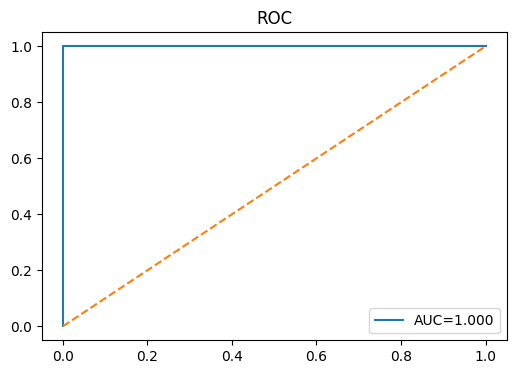


Top features:
        feature  importance
4         FFMC    0.612136
7          ISI    0.360152
16     FWI_log    0.013626
9          FWI    0.011627
1           RH    0.001265
13  FFMC_x_DMC    0.000311
6           DC    0.000241
14      DC_log    0.000218
11     Dryness    0.000194
5          DMC    0.000082
8          BUI    0.000054
15     BUI_log    0.000030
12     Temp_Ws    0.000022
3         Rain    0.000019
10      IsRain    0.000012


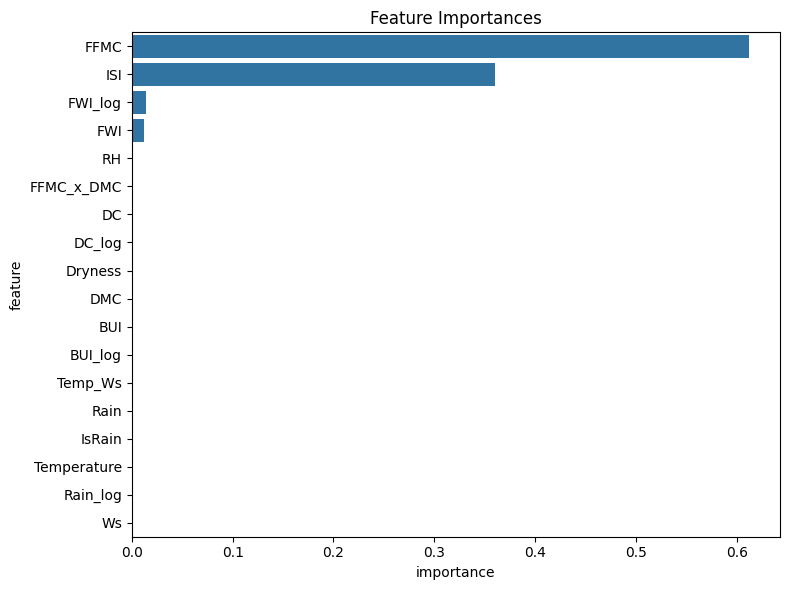


Saved model to: saved_models/rf_best_pipeline.joblib
Saved metadata to: saved_models/model_metadata.joblib

Example test row prediction: {'pred': 1, 'probability': 1.0, 'threshold': 0.5851353471805727}

--- Done ---


In [33]:
# forest_fire_final.py
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix,
    precision_recall_curve, f1_score, accuracy_score, average_precision_score, roc_curve, auc
)
from scipy.stats import randint
import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42
MODEL_OUTPATH = "saved_models"
os.makedirs(MODEL_OUTPATH, exist_ok=True)

# ------------------------
# 1) Load & basic clean
# ------------------------
df = pd.read_csv("Algerian_forest_fires_dataset.csv")
df.columns = df.columns.str.strip()

# drop date columns and rename label
if set(['day','month','year']).issubset(df.columns):
    df = df.drop(columns=['day','month','year'], errors='ignore')

if 'Classes' in df.columns:
    df.rename(columns={'Classes': 'Fire_Risk'}, inplace=True)

# map label: 'fire'->1 else 0 (be robust to cases)
df['Fire_Risk'] = df['Fire_Risk'].apply(lambda x: 1 if str(x).strip().lower() == 'fire' else 0)

# drop cols with too many missing or unwanted columns - you can customize
# convert non-label columns to numeric coerce
for c in df.columns:
    if c != 'Fire_Risk':
        df[c] = pd.to_numeric(df[c], errors='coerce')

# drop rows fully NaN in features or label missing
df = df.dropna(subset=['Fire_Risk'])
df = df.dropna(how='all', subset=[c for c in df.columns if c != 'Fire_Risk'])

# fill remaining missing numeric with median
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = [c for c in num_cols if c != 'Fire_Risk']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# ------------------------
# 2) Feature engineering (keep & expand your derived features)
# ------------------------
df_fe = df.copy()

# derived binaries and interactions
df_fe['IsRain'] = (df_fe['Rain'] > 0).astype(int)
df_fe['Dryness'] = df_fe['Temperature'] / (df_fe['RH'] + 1e-6)
df_fe['Temp_Ws'] = df_fe['Temperature'] * df_fe['Ws']
if set(['FFMC','DMC']).issubset(df_fe.columns):
    df_fe['FFMC_x_DMC'] = df_fe['FFMC'] * df_fe['DMC']

# log transforms for heavy tailed / non-negative
for c in ['DC','BUI','FWI','Rain']:
    if c in df_fe.columns:
        df_fe[c + '_log'] = np.log1p(df_fe[c].clip(lower=0))

# final features list
features = [c for c in df_fe.columns if c not in ['Fire_Risk']]
print("Features prepared:", features)

# class balance
print("\nClass distribution (fraction):")
print(df_fe['Fire_Risk'].value_counts(normalize=True))

# ------------------------
# 3) Train/validation/test split
# ------------------------
X = df_fe[features]
y = df_fe['Fire_Risk']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=RANDOM_STATE
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=RANDOM_STATE
)
print("\nSizes: train/val/test:", X_train.shape, X_val.shape, X_test.shape)

# ------------------------
# 4) Preprocessor + pipeline
# ------------------------
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols)
])

# candidate models
pipe_rf = Pipeline([('pre', preprocessor),
                    ('clf', RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE))])

pipe_xgb = Pipeline([('pre', preprocessor),
                     ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE))])

# quick baseline fit RF & XGB (default)
print("\nFitting baseline RandomForest and XGBoost...")
pipe_rf.set_params(clf__n_estimators=200)
pipe_rf.fit(X_train, y_train)
pipe_xgb.set_params(clf__n_estimators=200, clf__learning_rate=0.05)
pipe_xgb.fit(X_train, y_train)

# ------------------------
# 5) Evaluate baseline on validation
# ------------------------
def eval_model(pipe, X_v, y_v, name="Model"):
    probs = pipe.predict_proba(X_v)[:,1]
    preds = (probs >= 0.5).astype(int)
    print(f"\n{name} (threshold=0.5) --")
    print(classification_report(y_v, preds, digits=3))
    print("ROC-AUC:", roc_auc_score(y_v, probs))
    cm = confusion_matrix(y_v, preds)
    print("Confusion matrix:\n", cm)

eval_model(pipe_rf, X_val, y_val, "RandomForest (baseline)")
eval_model(pipe_xgb, X_val, y_val, "XGBoost (baseline)")

# ------------------------
# 6) Randomized search for best RF (you can extend to XGBoost)
# ------------------------
print("\nRandomized search CV for RandomForest (short search)...")
rf_param_dist = {
    "clf__n_estimators": randint(100, 500),
    "clf__max_depth": randint(3, 20),
    "clf__min_samples_split": randint(2, 20),
    "clf__min_samples_leaf": randint(1, 10),
    "clf__max_features": ["sqrt", "log2", None]
}
rf_search = RandomizedSearchCV(pipe_rf, rf_param_dist, n_iter=20, scoring="f1", cv=3,
                               random_state=RANDOM_STATE, n_jobs=-1, verbose=1)
rf_search.fit(X_train, y_train)
print("Best RF params:", rf_search.best_params_)
best_rf = rf_search.best_estimator_

# Evaluate best model on validation
eval_model(best_rf, X_val, y_val, "RandomForest (tuned)")

# ------------------------
# 7) Threshold tuning (for high recall)
# ------------------------
probs = best_rf.predict_proba(X_val)[:,1]
prec, rec, thresh = precision_recall_curve(y_val, probs)

# choose threshold with recall >= 0.9 if exists, else use 0.5
idxs = np.where(rec >= 0.9)[0]
chosen_threshold = 0.5
if idxs.size > 0:
    # pick threshold with best f1 among those
    best_f1 = -1
    for i in idxs:
        # alignment: thresh has length len(prec)-1
        if i == 0:
            continue
        t = thresh[i-1]
        preds = (probs >= t).astype(int)
        f1 = f1_score(y_val, preds)
        if f1 > best_f1:
            best_f1 = f1
            chosen_threshold = t
    print("Found thresholds meeting recall>=0.9, selected threshold:", chosen_threshold)
else:
    print("Could not find threshold achieving recall>=0.9 on validation; using default 0.5")

# ------------------------
# 8) Final evaluation on test set with chosen threshold
# ------------------------
def evaluate_with_threshold(pipe, X, y, threshold, name):
    probs = pipe.predict_proba(X)[:,1]
    preds = (probs >= threshold).astype(int)
    print(f"\n{name} Evaluation (threshold={threshold:.3f})")
    print(classification_report(y, preds, digits=3))
    print("ROC-AUC:", roc_auc_score(y, probs))
    print("Average Precision (PR AUC):", average_precision_score(y, probs))
    print("Confusion matrix:\n", confusion_matrix(y, preds))

evaluate_with_threshold(best_rf, X_test, y_test, chosen_threshold, "RandomForest (tuned)")

# ROC curve
probs_test = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, probs_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4)); plt.plot(fpr,tpr,label=f"AUC={roc_auc:.3f}"); plt.plot([0,1],[0,1],'--'); plt.title("ROC"); plt.legend(); plt.show()

# ------------------------
# 9) Feature importances
# ------------------------
feat_names = X_train.columns
importances = best_rf.named_steps['clf'].feature_importances_
fi = pd.DataFrame({'feature': feat_names, 'importance': importances}).sort_values('importance', ascending=False)
print("\nTop features:\n", fi.head(15))
plt.figure(figsize=(8,6)); sns.barplot(x='importance', y='feature', data=fi.head(20)); plt.title("Feature Importances"); plt.tight_layout(); plt.show()

# ------------------------
# 10) Save final pipeline & threshold
# ------------------------
model_fname = os.path.join(MODEL_OUTPATH, "rf_best_pipeline.joblib")
meta_fname = os.path.join(MODEL_OUTPATH, "model_metadata.joblib")
joblib.dump(best_rf, model_fname)
joblib.dump({'threshold': float(chosen_threshold), 'features': list(features)}, meta_fname)
print("\nSaved model to:", model_fname)
print("Saved metadata to:", meta_fname)

# ------------------------
# 11) Helper: load and predict single sample
# ------------------------
def load_model(model_path=model_fname, meta_path=meta_fname):
    model = joblib.load(model_path)
    meta = joblib.load(meta_path)
    return model, meta

def predict_single(sample_dict, model, meta, return_proba=True, threshold=None):
    """
    sample_dict: dict of feature_name -> value (must include all features)
    model: pipeline loaded
    meta: metadata with 'threshold' and 'features'
    """
    features_list = meta['features']
    x = pd.DataFrame([sample_dict], columns=features_list)
    proba = model.predict_proba(x)[:,1][0]
    thr = threshold if threshold is not None else meta.get('threshold', 0.5)
    pred = int(proba >= thr)
    if return_proba:
        return {'pred': pred, 'probability': float(proba), 'threshold': float(thr)}
    else:
        return {'pred': pred}

# example usage:
model_loaded, meta_loaded = load_model()
example = X_test.iloc[0].to_dict()
print("\nExample test row prediction:", predict_single(example, model_loaded, meta_loaded))

print("\n--- Done ---")


In [35]:
from google.colab import files
files.download("saved_models/rf_best_pipeline.joblib")
files.download("saved_models/model_metadata.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
import joblib
model, meta = joblib.load("saved_models/rf_best_pipeline.joblib"), joblib.load("saved_models/model_metadata.joblib")


In [37]:
sample = {
    'Temperature': 30,
    'RH': 45,
    'Ws': 15,
    'Rain': 0,
    'FFMC': 85,
    'DMC': 50,
    'DC': 120,
    'BUI': 75,
    'FWI': 10,
    'IsRain': 0,
    'Dryness': 30/45,
    'Temp_Ws': 30*15,
    'FFMC_x_DMC': 85*50,
    'DC_log': np.log1p(120),
    'BUI_log': np.log1p(75),
    'FWI_log': np.log1p(10),
    'Rain_log': np.log1p(0)
}
print(predict_single(sample, model, meta))


{'pred': 1, 'probability': 0.9915665650906273, 'threshold': 0.5851353471805727}
